# Exploratory Data Analysis

탐색적 데이터 분석 

In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

# 노트북 셀 표시를 브라우저 전체 폭 사용하기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import clear_output

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys, shutil, functools
import collections, pathlib, re, string

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=5)
np.set_printoptions(formatter={'float_kind': "{:.5f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import scipy as sp

import seaborn as sns

from pydataset import data

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"scipy ver={sp.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.23.1
scipy ver=1.9.0


In [2]:
# Iris 데이터 셋의 컬럼 정보 살피기
df_iris = data('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## 데이터의 상관

**상관계수**

상관계수는 두 변수 사이의 통계적 관계를 수치적으로 나타낸 계수입니다. 두 변수 사이의 통계가 관계를 나타내는 지표로 -1 ~ 1 사이의 값을 가집니다.

예로 기온와 아이스크림 판매량, 수입과 외식 횟수와 같이 어느 한 변수가 다른 변수와 증감 관계가 있는지 판단하여 결과를 이용하고자 할때 사용합니다. 하지만 해석에 주의해야 할점은 상관관계가 높은 것은 두 변수의 증감이 서로 밀접한 상관이 있다는 수치 일 뿐 두 변수가 원인과 결과 관계를 가진다는 의미는 아니라는 점입니다.   

![](https://getcalc.com/formula/statistics/correlation-coefficient.png)

https://getcalc.com/statistics-correlation-coefficient-calculator.htm

* 1: 양의상관, 한 변수가 증가하면 다른 변수도 증가
* -1: 음의상관, 한 변수가 증가하면 다른 변수는 감소, 한 변수가 감소하면 다른 변수는 증가
* 0: 무상관, 두 변수의 증가 감소가 서로 상관 없음

**산점도**

상관관계를 산점도로 표시하면 좀 더 시각적으로 두 변수의 상관 관계를 파악해 볼 수 있습니다.

![](https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png)

https://byjus.com/maths/correlation/


**Further Reading**
* [NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)

In [3]:
# pandas 의 corr() 를 이용하여 상관 계수 구하기
df_corr = df_iris.corr(method='pearson')
df_corr

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.00000,-0.11757,0.87175,0.81794
Sepal.Width,-0.11757,1.00000,-0.42844,-0.36613
Petal.Length,0.87175,-0.42844,1.00000,0.96287
Petal.Width,0.81794,-0.36613,0.96287,1.00000


stats.pearsonr() 함수를 이용하면 상관 계수 r 및 p-value 값을 구할 수 있습니다.

상관계수의 수치만 보고 애매할때가 있는데 p-value가 0.05보다 작을 경우

* H0 명제 '두 변수간의 상관 관계가 없다'를 기각 
* H1 명제 '두 변수간의 상관 관계가 있다'를 채택

할 수 있으므로 두 변수의 상관에 대한 판단을 좀더 수치적으로 할 수 있게 됩니다.

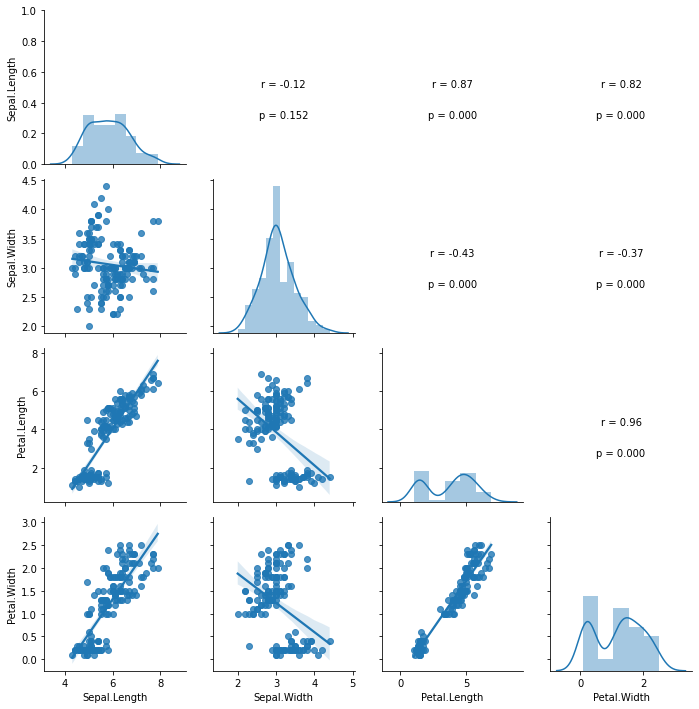

In [4]:
# https://stackoverflow.com/questions/63416894/correlation-values-in-pairplot
# stats.pearsonr() 함수를 이용하면 상관 계수 r 및 p-value 값을 구할 수 있습니다.
# 상관계수의 수치만 보고 애매할때가 있는데 p-value가 0.05보다 작을 경우 
# '두 변수간의 상관 관계가 없다'는 H0 명제를 기각하고 '두 변수간의 상관 관계가 있다'는 H1 명제를 채택할 수 있으므로
# 두 변수의 상관에 대한 판단을 좀더 수치적으로 할 수 있게 됩니다.
def pearsonr(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = sp.stats.pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.3f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')    
    ax.set_axis_off()

g = sns.PairGrid(df_iris)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(pearsonr)

**히트맵**

데이터가 많은 경우 산점도를 그래프로 표시하는 것이 힘들 경우가 있습니다. 이때는 상관 계수값을 히트맵을 통해 시각화하여 좀더 빠르게 살펴볼 수 있습니다.

In [5]:
# pandas에서 구한 corr 테이블에 색을 입혀 간단하게 히트맵을 그려봅니다.
df_corr.style.background_gradient(cmap='YlOrRd')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

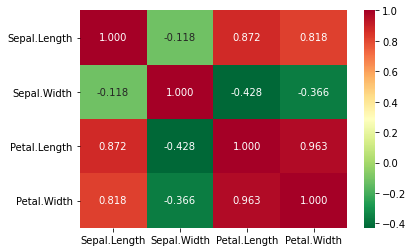

In [6]:
# seaborn의 heatmap() 를 이용해서도 나타날수 있습니다.
sns.heatmap(df_corr, annot=True, fmt='.3f', cmap='RdYlGn_r')

**순위 상관**

데이터가 서열 척도 같은 순위 데이터일 경우 두 변수 간의 상관 관계를 나타낼때는 순위 상관계수를 이용합니다.

스피어만의 순위 상관계수

순위 데이터를 가지고 피어슨의 확률 상관계수를 계산하면 스피어만의 순위 상관 계수임

![](https://slidetodoc.com/presentation_image_h/f9e4f49393e0bc2b8b63898bc5ab238c/image-2.jpg)

https://slidetodoc.com/spearmans-rank-correlation-spearmans-rank-correlation-coefficient-measures/

켄달의 순위 상관계수

두 변수 X, Y에 대하여 소비자 1,2,3 이 각각 선호도 순위를 평가한 값에서 소비자 1,2,3중 두 소비자의 조합: (1, 2), (1, 3), (2, 3) 중 X, Y에 대한 순위의 크기가 일치하거나 일치하지 않는 쌍의 수를 이용하여 지표 계산

소비자 1의 순위 데이터 (X1, Y1), 소비자 2의 순위 데이터 (X2, Y2) 라고 한다면,

* 일치: X1 < X2 이고 Y1 < Y2, 또는 X1 > X2 이고 Y1 > Y2 일때
* 불일치: X1 < X2 이고 Y1 > Y2 또는 X1 > X2 이고 Y1 < Y2 일때

$$tau = \frac{(n_{concordant} - n_{disconcordant})}{\frac{n(n-1)}{2}}$$
 
https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

In [7]:
df_race = pd.DataFrame(
    [
        [4,5],
        [10,8],
        [3,6],
        [1,2],
        [9,10],
        [2,3],
        [6,9],
        [7,4],
        [8,7],
        [5,1]        
    ],
    columns=["X rank","Y rank"])
df_race.head()

,X rank,Y rank
0,4,5
1,10,8
2,3,6
3,1,2
4,9,10


In [8]:
# pandas 의 corr() 를 이용하여 순위 상관 계수 구하기
# method = 'spearman', 'kendall'
df_corr = df_race.corr(method='spearman')
df_corr.style.background_gradient(cmap='YlOrRd')

,X rank,Y rank
X rank,1.000000,0.684848
Y rank,0.684848,1.000000


<AxesSubplot:>

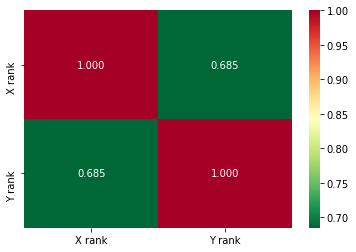

In [9]:
# seaborn의 heatmap() 를 이용해서도 나타날수 있습니다.
sns.heatmap(df_corr, annot=True, fmt='.3f', cmap='RdYlGn_r')

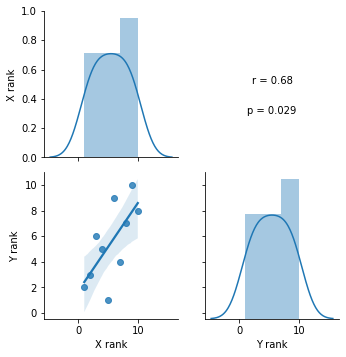

In [10]:
# stats.spearmanr() 함수를 이용 순위 상관 계수 r 및 p-value 값
def spearmanr(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = sp.stats.spearmanr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.3f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')    
    ax.set_axis_off()

# stats.kendalltau() 함수를 이용 순위 상관 계수 r 및 p-value 값
def kendalltau(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r = sp.stats.kendalltau(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.3f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')    
    ax.set_axis_off()

g = sns.PairGrid(df_race)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(spearmanr)
#g.map_upper(kendalltau)